In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from util import *
import numpy as np
from scipy.stats.stats import pearsonr
import os
import matplotlib.ticker as tck

error_df_path = 'error_df.csv'

if not os.path.exists(error_df_path):
    exit()

C:\Users\satya\AppData\Local\Temp\ipykernel_14324\1147859349.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [23]:
error_df_path = 'error_df.csv'

if not os.path.exists(error_df_path):
    exit()


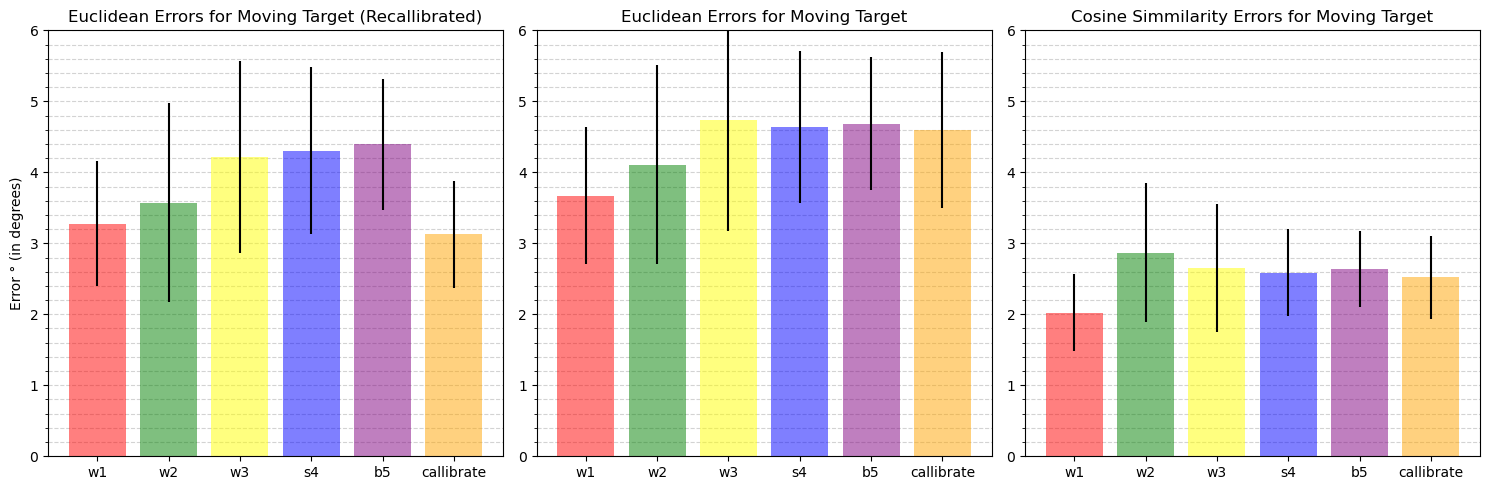

In [105]:
#Plotting means with CI of 95%

df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][0])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][0])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][0])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][0])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][0])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][0])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc', 'callibrate_euc']]
y1_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
y1vals = df.mean()+np.abs(df.values.min())


df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][1])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][1])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][1])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][1])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][1])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][1])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc', 'callibrate_euc']]
y2vals = df.mean()+np.abs(df.values.min())
y2_std = df.std()/np.sqrt(df.shape[0])*1.96


df = pd.read_csv(error_df_path, index_col=False)
df = df[['w1_vec', 'w2_vec', 'w3_vec', 's4_vec', 'b5_vec', 'callibrate_vec']]
y3_std = df.std()/np.sqrt(df.shape[0])*1.96
y3vals = df.mean()+np.abs(df.values.min())


low = min(y1vals)
high = max(y1vals)
labels = [x[:-4] for x in df.columns]
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
titles = ['Euclidean Errors for Moving Target (Recallibrated)', 'Euclidean Errors for Moving Target', 'Cosine Simmilarity Errors for Moving Target']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].bar(xvals, y1vals, yerr=y1_std, align='center', alpha=0.5, color=colors)
axes[1].bar(xvals, y2vals, yerr=y2_std, align='center', alpha=0.5, color=colors)
axes[2].bar(xvals, y3vals, yerr=y3_std, align='center', alpha=0.5, color=colors)
axes[0].set_ylabel('Error ° (in degrees)')

for index,ax in  enumerate(axes):
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.grid(color='lightgray', which='both', linestyle='dashed') 
    plt.sca(ax)
    plt.xticks(range(len(df.columns)), labels)
    plt.title(titles[index])
    plt.ylim([0, 6])
    plt.axhline(y=100, zorder=0)


fig.tight_layout()
plt.tight_layout()

plt.show()

    


Text(0.5, 1.0, 'Latency to Fixate on Moving Target')

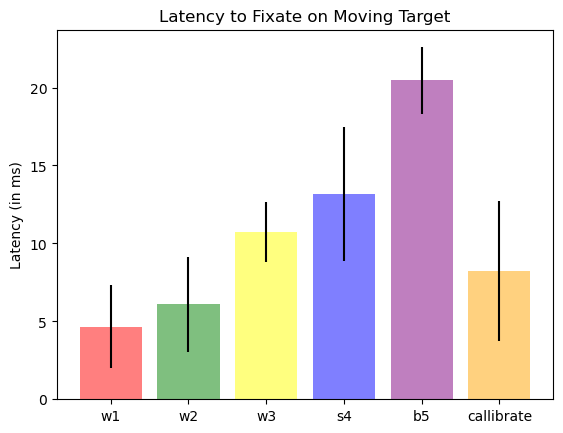

In [96]:
df = pd.read_csv(error_df_path, index_col=False)
df['w1_index'] = df['w1_index'].apply(lambda p: p*100/60)
df['w2_index'] = df['w2_index'].apply(lambda p: p*100/60)
df['w3_index'] = df['w3_index'].apply(lambda p: p*100/60)
df['s4_index'] = df['s4_index'].apply(lambda p: p*100/60)
df['b5_index'] = df['b5_index'].apply(lambda p: p*100/60)
df['callibrate_index'] = df['callibrate_index'].apply(lambda p: p*100/60)
df = df[['w1_index', 'w2_index', 'w3_index', 's4_index', 'b5_index', 'callibrate_index']]
y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()+np.abs(df.values.min())

plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color=colors)
plt.xticks(range(len(df.columns)), labels)
plt.ylabel('Latency (in ms)')
plt.title('Latency to Fixate on Moving Target')
